<a href="https://colab.research.google.com/github/Chhayaonly/food101/blob/main/food101_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/my_food101_model.keras')
model.save('my food101model.h5')

In [4]:
def predict_food101(img_path):
    # Read and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to match model's input shape
    img = img / 255.0  # Normalize the image (since I used ImageDataGenerator with rescale=1./255)

    # Add a batch dimension (since model expects a batch of images)
    img = np.expand_dims(img, axis=0)

   # Predict the class
    pred = model.predict(img)
    pred_class = np.argmax(pred, axis=-1)[0]  # Get the class index with the highest probability
    pred_confidence = np.max(pred)  # Confidence score (probability) for the predicted class

    # Print the class name based on the predicted index
    food_classes = [
        'burger', 'butter naan', 'chai', 'chapati', 'chole_bhature', 'dal makhani',
        'dhokla', 'fried_rice', 'idli', 'jalebi', 'kathi roll', 'kadhai paneer',
        'kulfi', 'butter naan', 'momos', 'paani puri', 'pakode', 'pav bhaji', 'pizza', 'samosa'
    ]

    # Print the predicted class with accuracy
    print(f'I am {pred_confidence * 100:.2f}% confident that this is an image of {food_classes[pred_class]}')




Enter image path: /content/download.jpg


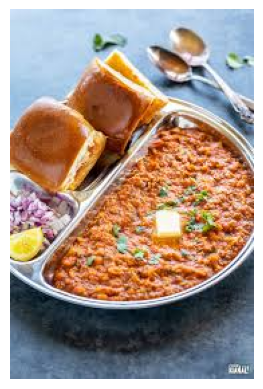

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
I am 97.08% confident that this is an image of pav bhaji


In [5]:
def show_rgb(image):
    image=cv2.imread(image)
    image_rgb = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Input image path
img_path = input('Enter image path: ')
show_rgb(img_path)
predict_food101(img_path)
